In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [11]:
# Load dataset
df = pd.read_csv("Loan_Default.csv")

# Drop unnecessary columns
df.drop(columns=['ID', 'year'], inplace=True)

# Split features and target
X = df.drop(columns=['Status'])
y = df['Status']


In [47]:
df.head()
df.info() ,df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 70 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   loan_amount                         148670 non-null  float64
 1   rate_of_interest                    148670 non-null  float64
 2   Interest_rate_spread                148670 non-null  float64
 3   Upfront_charges                     148670 non-null  float64
 4   term                                148670 non-null  float64
 5   property_value                      148670 non-null  float64
 6   income                              148670 non-null  float64
 7   Credit_Score                        148670 non-null  float64
 8   LTV                                 148670 non-null  float64
 9   dtir1                               148670 non-null  float64
 10  loan_limit_cf                       148670 non-null  float64
 11  loan_limit_ncf            

(None,
          loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
 count  148670.000000     148670.000000         148670.000000    148670.000000   
 mean        0.088376          0.503985              0.581419         0.050957   
 std         0.051660          0.061043              0.063746         0.046633   
 min         0.000000          0.000000              0.000000         0.000000   
 25%         0.050562          0.468750              0.546033         0.020833   
 50%         0.078652          0.498750              0.575897         0.043274   
 75%         0.117978          0.531250              0.608721         0.064825   
 max         1.000000          1.000000              1.000000         1.000000   
 
                 term  property_value         income   Credit_Score  \
 count  148670.000000   148670.000000  148670.000000  148670.000000   
 mean        0.905846        0.029199       0.011897       0.499473   
 std         0.221222        0.020729   

In [12]:
# Identify column types
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [13]:
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])


cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


In [14]:

# Combine them
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Apply to data
X_clean = preprocessor.fit_transform(X)

In [15]:
# Convert back to DataFrame if needed
feature_names = (
    list(preprocessor.named_transformers_['num'].get_feature_names_out(num_cols))
    if hasattr(preprocessor.named_transformers_['num'], 'get_feature_names_out') else list(num_cols)
)
cat_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_cols)
columns = feature_names + list(cat_names)

X_clean_df = pd.DataFrame(X_clean, columns=columns)

In [16]:
# Final clean data ready for modeling
X_clean_df['Status'] = y.reset_index(drop=True)

# Save clean data if needed
X_clean_df.to_csv("Loan_Default_Cleaned.csv", index=False)


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [18]:
# Load dataset
df = pd.read_csv("Loan_Default_Cleaned.csv")





In [19]:
df.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,...,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct,Status
0,0.028090,0.49875,0.575897,0.043274,1.0,0.006667,0.003007,0.6450,0.012485,0.714286,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1
1,0.053371,0.49875,0.575897,0.043274,1.0,0.024848,0.008607,0.1300,0.009472,0.607143,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,0.109551,0.57000,0.548678,0.009917,1.0,0.030303,0.016385,0.8350,0.010096,0.732143,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,0.123596,0.53125,0.617441,0.043274,1.0,0.039394,0.020533,0.2175,0.008737,0.660714,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4,0.191011,0.50000,0.563574,0.000000,1.0,0.045455,0.018044,0.2550,0.011611,0.607143,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


In [20]:
X = df.drop(columns=['Status'])
y = df['Status']



In [48]:
df.columns

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'dtir1', 'loan_limit_cf', 'loan_limit_ncf', 'Gender_Female',
       'Gender_Joint', 'Gender_Male', 'Gender_Sex Not Available',
       'approv_in_adv_nopre', 'approv_in_adv_pre', 'loan_type_type1',
       'loan_type_type2', 'loan_type_type3', 'loan_purpose_p1',
       'loan_purpose_p2', 'loan_purpose_p3', 'loan_purpose_p4',
       'Credit_Worthiness_l1', 'Credit_Worthiness_l2', 'open_credit_nopc',
       'open_credit_opc', 'business_or_commercial_b/c',
       'business_or_commercial_nob/c', 'Neg_ammortization_neg_amm',
       'Neg_ammortization_not_neg', 'interest_only_int_only',
       'interest_only_not_int', 'lump_sum_payment_lpsm',
       'lump_sum_payment_not_lpsm', 'construction_type_mh',
       'construction_type_sb', 'occupancy_type_ir', 'occupancy_type_pr',
       'occupancy_type_sr', 'Secured_by_home', 'Secured_by_land',


In [21]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((118936, 69), (29734, 69), (118936,), (29734,))

In [23]:

# Identify column types
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X_train.select_dtypes(include='object').columns


In [24]:
num_cols, cat_cols


(Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
        'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
        'LTV', 'dtir1', 'loan_limit_cf', 'loan_limit_ncf', 'Gender_Female',
        'Gender_Joint', 'Gender_Male', 'Gender_Sex Not Available',
        'approv_in_adv_nopre', 'approv_in_adv_pre', 'loan_type_type1',
        'loan_type_type2', 'loan_type_type3', 'loan_purpose_p1',
        'loan_purpose_p2', 'loan_purpose_p3', 'loan_purpose_p4',
        'Credit_Worthiness_l1', 'Credit_Worthiness_l2', 'open_credit_nopc',
        'open_credit_opc', 'business_or_commercial_b/c',
        'business_or_commercial_nob/c', 'Neg_ammortization_neg_amm',
        'Neg_ammortization_not_neg', 'interest_only_int_only',
        'interest_only_not_int', 'lump_sum_payment_lpsm',
        'lump_sum_payment_not_lpsm', 'construction_type_mh',
        'construction_type_sb', 'occupancy_type_ir', 'occupancy_type_pr',
        'occupancy_type_sr', 'Secured_by_home', 'Sec

In [34]:
# Preprocessing pipeline
num_pipeline_v2 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])
cat_pipeline_v2 = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline_v2, num_cols),
    ('cat', cat_pipeline_v2, cat_cols)
])


In [35]:

# Apply transformation
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [36]:
X_test_preprocessed.shape, X_train_preprocessed.shape 
X_test_preprocessed, X_train_preprocessed

(array([[0.18318318, 0.46875   , 0.51865618, ..., 1.        , 0.        ,
         1.        ],
        [0.07207207, 0.578125  , 0.635797  , ..., 0.        , 0.        ,
         1.        ],
        [0.07807808, 0.453125  , 0.54646176, ..., 1.        , 0.        ,
         1.        ],
        ...,
        [0.13513514, 0.390625  , 0.42573267, ..., 1.        , 0.        ,
         1.        ],
        [0.04804805, 0.65625   , 0.7231737 , ..., 0.        , 0.        ,
         1.        ],
        [0.05405405, 0.59375   , 0.6129664 , ..., 1.        , 0.        ,
         1.        ]], shape=(29734, 69)),
 array([[0.05705706, 0.359375  , 0.45655468, ..., 1.        , 0.        ,
         1.        ],
        [0.13513514, 0.53125   , 0.54724803, ..., 0.        , 0.        ,
         1.        ],
        [0.09309309, 0.49875   , 0.57589707, ..., 0.        , 0.        ,
         1.        ],
        ...,
        [0.2042042 , 0.453125  , 0.52270193, ..., 0.        , 0.        ,
         1.    

In [37]:
# Build ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_preprocessed, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)



Epoch 1/20


/home/aman/miniconda3/envs/pydata-book/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1487/1487 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8380 - loss: 0.4123 - val_accuracy: 0.8656 - val_loss: 0.3482
Epoch 2/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8662 - loss: 0.3498 - val_accuracy: 0.8700 - val_loss: 0.3303
Epoch 3/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8693 - loss: 0.3295 - val_accuracy: 0.8729 - val_loss: 0.2955
Epoch 4/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8784 - loss: 0.2901 - val_accuracy: 0.8916 - val_loss: 0.2488
Epoch 5/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8931 - loss: 0.2374 - val_accuracy: 0.9380 - val_loss: 0.1442
Epoch 6/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9196 - loss: 0.1676 - val_accuracy: 0.9543 - val_loss: 0.1066
Epoch 7/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9284 - loss: 0.1470 - val_accuracy: 0.9520 - val_loss: 0.1008
Epoch 8/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9351 - loss: 0.1354 - val_accurac

In [38]:
# Evaluate model
loss, accuracy = model.evaluate(X_test_preprocessed, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


930/930 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.0733
Test Accuracy: 0.9746


In [39]:

# Predict and plot
y_pred = (model.predict(X_test_preprocessed) > 0.5).astype(int)


930/930 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


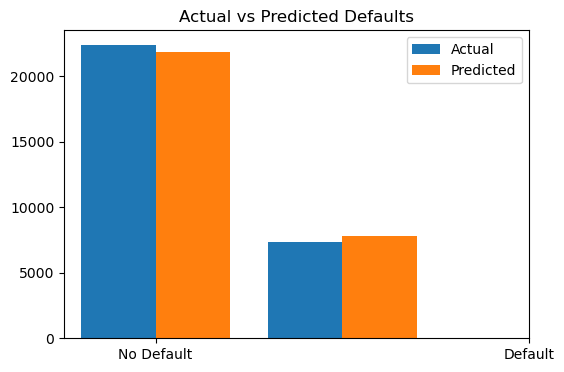

In [42]:
# Plot predicted vs actual
plt.figure(figsize=(6, 4))
plt.hist([y_test, y_pred.flatten()], label=["Actual", "Predicted"], bins=2, align='left')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.title("Actual vs Predicted Defaults")
plt.legend()
plt.show()

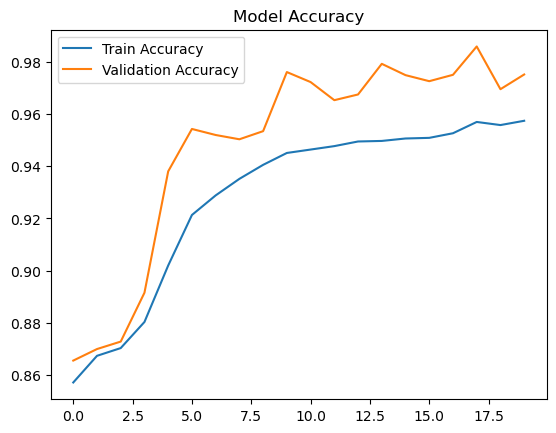

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()
